Confusion Matrix for K=1:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Confusion Matrix for K=20:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


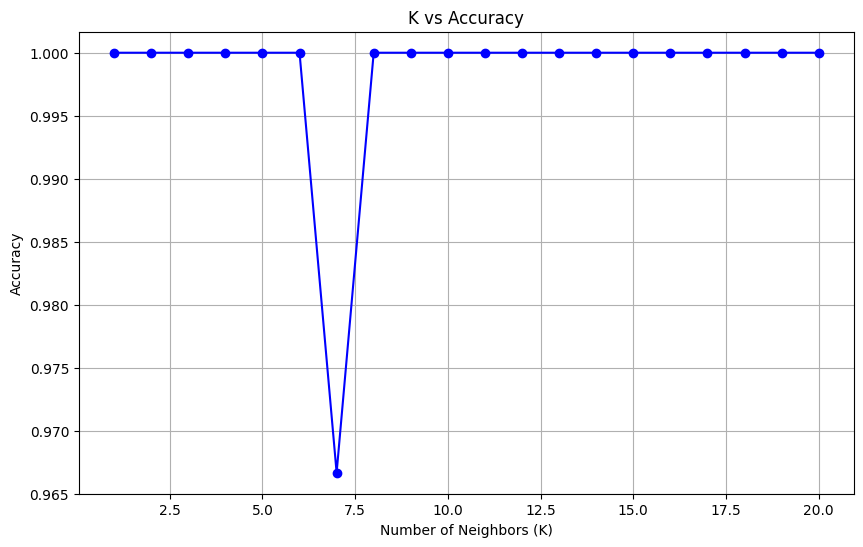

The best K value is 1 with an accuracy of 1.00


In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
df = pd.read_csv('/content/iris.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def evaluate_knn(k_values):
    accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        if k == 1 or k == len(k_values):
            print(f"Confusion Matrix for K={k}:")
            print(confusion_matrix(y_test, y_pred))
    return accuracies
k_values = range(1, 21)
accuracies = evaluate_knn(k_values)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('K vs Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"The best K value is {best_k} with an accuracy of {best_accuracy:.2f}")